In [1]:
from analytics import *
%matplotlib inline

# Timestamp Analyses:

## nsp1016_448_cs1.3

- Training on CS1
- LOF on 1 ThetaGPU node
- 160 MD Runs (1 per GPU on 20 ThetaGPU nodes)

Parsing CS1 training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/cs1_run.log
Scanning md_runs for start/end times (this takes a while...)


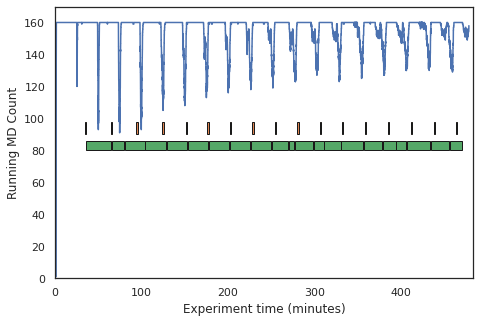

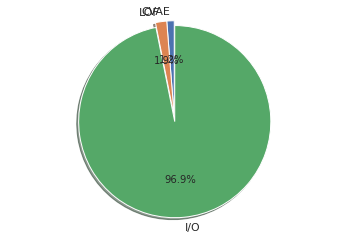

In [2]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/")
save_fig('timeline_nsp1016_448_cs1.3')
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/")
save_fig('lof_profile_nsp1016_448_cs1.3')

## nsp1016_448_gpu.1

- Training on 1 GPU node
- LOF on 1 ThetaGPU node
- 152 MD Runs (1 per GPU on 19 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/training.log
Scanning md_runs for start/end times (this takes a while...)


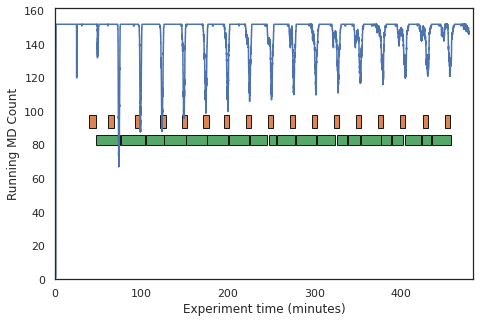

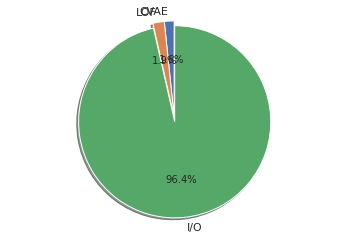

In [3]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/")

## nsp1016_448_gpu.2

- Training on 4 GPU nodes
- LOF on 1 ThetaGPU node
- 128 MD Runs (1 per GPU on 16 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/training.log
Scanning md_runs for start/end times (this takes a while...)


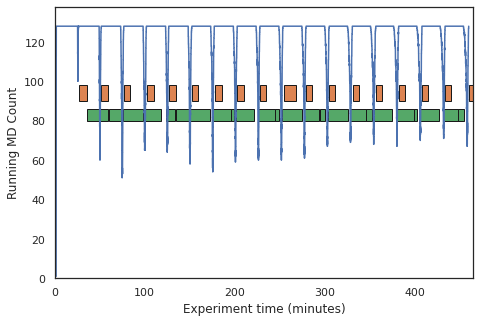

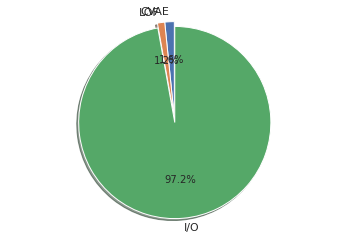

In [4]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/")

## bba_28_gpu.1

- Training on 1 GPU nodes
- LOF on 1 ThetaGPU node
- 152 MD Runs (1 per GPU on 19 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/training.log
Scanning md_runs for start/end times (this takes a while...)


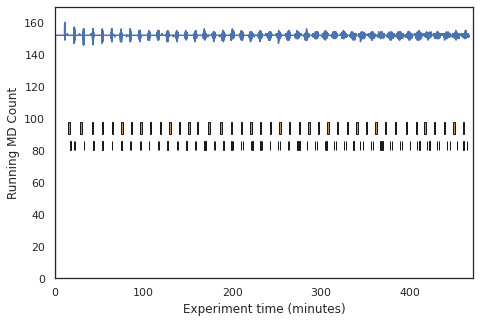

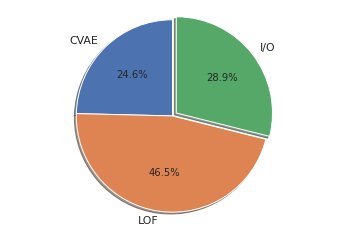

In [5]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/")
save_fig("timeline_bba_28_gpu.1")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/")
save_fig("lof_profile_bba_28_gpu.1")

# Learning Curve Analysis

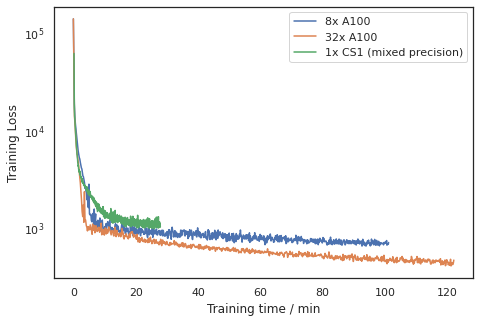

In [6]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"nsp1016_448_gpu.1", p/"nsp1016_448_gpu.2", p/"nsp1016_448_cs1.3"]
labels = ["8x A100", "32x A100", "1x CS1 (mixed precision)"]
plot_losses(paths, labels=labels, as_time=True)
save_fig("learning_curves_nsp1016")

# Conformational Sampling Analysis:

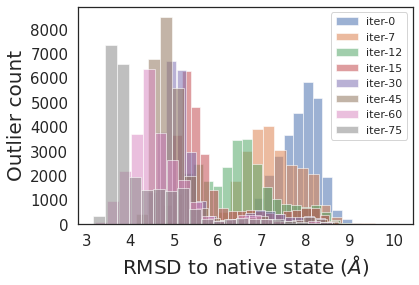

In [7]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier count"
iterations = list(range(0, 82, 15)) + [7, 12]
plot_conformational_sampling(paths, iterations, xlabel, ylabel)

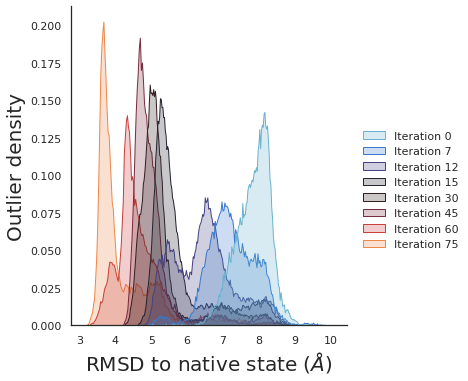

<Figure size 432x288 with 0 Axes>

In [8]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier density"
labels=[f"Iteration {i}" for i in sorted(iterations)]
iterations = list(range(0, 82, 15)) + [7, 12]
kde_conformational_sampling(paths, iterations, labels=labels, xlabel=xlabel, ylabel=ylabel)
save_fig("rmsd_kdes_bba_28_cs1.1")

/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1
/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2


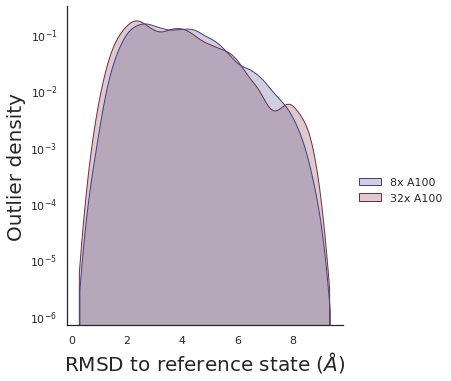

/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1
/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2


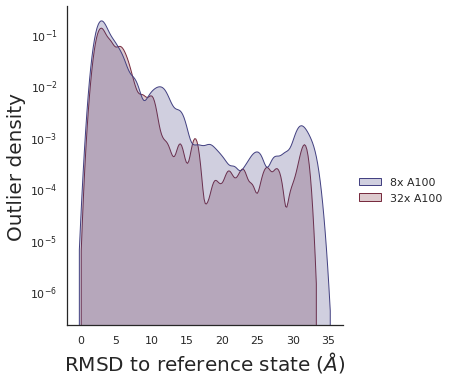

In [9]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"nsp1016_448_gpu.1", p/"nsp1016_448_gpu.2"]
xlabel = r"RMSD to reference state $(\AA)$"
ylabel = "Outlier density"
labels = ["8x A100", "32x A100"]
kde_run_comparison(paths, iteration=0, labels=labels, xlabel=xlabel, ylabel=ylabel)
kde_run_comparison(paths, iteration=-1, labels=labels, xlabel=xlabel, ylabel=ylabel)